# ADSF

In [1]:
import os, sys, time

sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
from physics_selections import pre_cuts
sys.path.append(os.getcwd() + "/uncertainties_dir/")
from jet_scale import jet_scale_shift_flat



Welcome to JupyROOT 6.10/00
home /home/gunter/WW_analysis/production/Analysis_13TeV
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [3]:
df    = load_origMC(columns_jets_unc)
df_da = load_origDATA()
df    = df[   (df.lep2_pt > 25)    & (df.mll > 30)  ]
df_da = df_da[(df_da.lep2_pt > 25) & (df_da.mll > 30)]


Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_alpha/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ;

In [4]:
static_weights = df.weight.values.copy() 
static_weights[static_weights == 0] = 0.000001


## Only gen weights

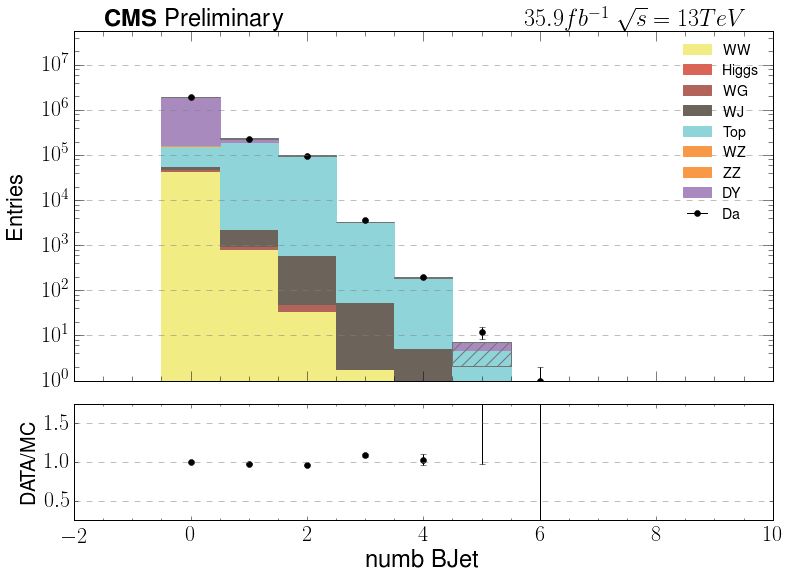

In [5]:
#df["weight"] = static_weights
#df["weight"] =  df.weight.values #/ np.abs(df.weight.values)# * df.bjet_weight.values
#df.weight.values[df.process == "Top"] *= calc_bjet_weight(df[df.process == "Top"], reader)
a, b, c, d= full_bin_plot(df, df_da, "numb_BJet", query=None,scales=scales, logy=None, x_range=None, y_range=None)#(0, 10e5))

(<matplotlib.figure.Figure at 0x7fc91e70ee90>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8da5c69d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8dab05210>], dtype=object))

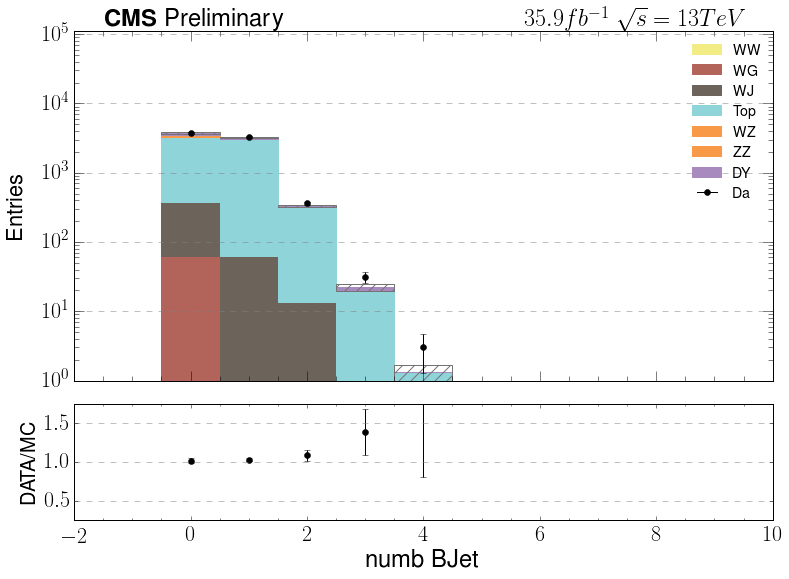

In [7]:
bins_mc = bin_df(df[(df.lep1_type == 13) & (df.lep2_type == 13) &\
                    (df.lep1_Charge == df.lep2_Charge) & (df.lep1_pt > 30) &\
                    (df.lep2_pt > 30) & (df.numb_jets >= 2) &\
                    (df.jet1_pt > 30) & (df.jet2_pt > 30) & (df.num)], "numb_BJet")
bins_da = bin_df(df_da[(df_da.lep1_type == 13) & (df_da.lep2_type == 13) &\
                    (df_da.lep1_Charge == df_da.lep2_Charge) & (df_da.lep1_pt > 30) &\
                    (df_da.lep2_pt > 30) & (df_da.numb_jets >= 2) &\
                    (df_da.jet1_pt > 30) & (df_da.jet2_pt > 30)], "numb_BJet")

full_plot(bins_mc, bins_da, color="color_1")

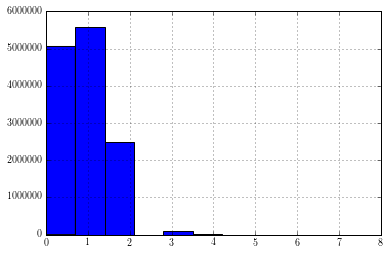

In [7]:
df.numb_BJet.hist()

In [8]:
df[static_weights == 0]

,index,jet3_pt,jet3_eta,jet4_phi,lep2_Charge,weight,jet5_flv,process,jet2_pt,jet1_pt,...,jet3_phi,mu_id_weight,numbExtraLep,el2_id_weight,el1_id_weight,jet1_eta,jet2_csv,jet6_eta,jet2_flv,pile_up_weight


In [9]:
(1. - 2. * 287118./1685970.)

0.6594031922276198

In [10]:
scales_['DYJetsToLL_M-50']

NameError: name 'scales_' is not defined

In [ ]:
scales['DYJetsToLL_M-50']

In [ ]:
df[df.process == "Top"].bjet_weight.hist(range=(.5, 1.5), bins=20)